# 🖥 RETO

## Background

Nuwefruit es una startup que busca revolucionar los hábitos de la población fomentando el cosumo de fruta a diario. Por este motivo, la empresa está especializada en la venta de fruta a domicilio, que gracias a su algoritmo de optimización de la última milla le permite tener unos costes logisticos muy bajos. Esto permite que Nuwefruit pueda vender fruta a un precio inferior al de su competencia. Su catálogo se basa en la venta de más de 20 tipos de frutas, que son las que presentan las mejores propiedades nutritivas.

## Overview: the dataset and challenge

Se emplearan dos datasets: el primero contiene datos de los clientes de Nuwefruit y el otro contiene los datos de los pedidos realizados por estos.

El dataset de clientes 'CLIENT TABLE' contiene las siguientes variables:

**CLIENT ID**: Identificador único del cliente
**CLIENT_SEGMENT**: Segmento de clientes  
**AVG CONSO**: Consumo medio mensual del cliente calculado a finales de 2020 (en piezas de fruta)  
**AVG BASKET SIZE**: Tamaño medio de la cesta del cliente calculado a finales de 2020 (en piezas de fruta)  
**RECEIVED_COMMUNICATION**: 1 = Recibió promoción de sus productos / 0 = no la recibió
Haz click aquí para descargar 'CLIENT TABLE' dataset.

El dataset de clientes 'ORDERS TABLE' contiene las siguientes variables:

**CLIENT ID**: Identificador único del cliente  
**NB PRODS**: Número de 'prods' de la variedad de fruta en el pedido (1 prod = 10 piezas de fruta)  
**ORDER ID**: Identificador único del pedido  
**FRUIT_PRODUCT**: Variedad de fruta  
Haz click aquí para descargar 'ORDERS TABLE' dataset.

## Objetivos

- Haz un analisis exploratorio de los datos que permita:
    - Analizar las ventas y la actividad de los clientes
    - Evaluar el impacto de la promoción
- Realiza un modelo predictivo que permita conocer el tipo de segmento al que pertenece cada cliente en función de las siguientes variables predictoras: Descargar test_x. (Se ha de predecir la variable (CLIENT_SEGMENT)).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
SEED = 42

In [3]:
PATH = './'


In [22]:
clients = pd.read_csv(PATH+'mwc22-client_table.csv', decimal=',')
orders = pd.read_csv(PATH+'mwc22-orders_table.csv', decimal=',')

dftest = pd.read_csv(PATH+'mwc22-client_table+-+test_x.csv', decimal=',')

In [25]:
dftest

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,8.33,100.00,0
1,18072186,93.42,186.83,1
2,48352246,45.83,137.50,0
3,18070621,16.67,200.00,1
4,48352262,13.33,160.00,0
5,48359553,16.67,200.00,0
6,18071647,8.33,100.00,1
7,48359574,54.17,162.50,0
8,48359627,26.67,106.67,0
9,18070505,166.67,333.33,1


In [14]:
clients.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0


In [20]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLIENT ID               35884 non-null  int64  
 1   CLIENT_SEGMENT          35884 non-null  int64  
 2   AVG CONSO               35884 non-null  float64
 3   AVG BASKET SIZE         35884 non-null  float64
 4   RECEIVED_COMMUNICATION  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [21]:
clients['CLIENT ID'].nunique()

35884

In [12]:
orders.FRUIT_PRODUCT.unique()

array(['Apple', 'Orange', 'Kiwi', 'Pear', 'Cheery', 'Watermelon',
       'Strawberry', 'Nectarine', 'Grape', 'Mango', 'Blueberry',
       'Pomegranate', 'Nuwe Fruit', 'Devil Fruit', 'Plum', 'Papaya',
       'Jackfruit', 'Pineapple', 'Lemon', 'Lime', 'Apricot', 'Coconut',
       'Melon', 'Banana'], dtype=object)

In [15]:
clients.CLIENT_SEGMENT.value_counts()

3    8123
4    7927
2    6760
1    6505
5    3429
6    3140
Name: CLIENT_SEGMENT, dtype: int64

In [16]:
orders.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [19]:
orders['CLIENT ID'].nunique()

14499

In [27]:
set([1,2,3]).intersection((2,4,5))

{2}

In [29]:
set(dftest['CLIENT ID']).intersection(set(clients['CLIENT ID']))

set()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold, train_test_split

from lightgbm import LGBMClassifier

In [35]:
clf = LGBMClassifier()

train_cols = ['AVG CONSO', 'AVG BASKET SIZE', 'RECEIVED_COMMUNICATION']
target = ['CLIENT_SEGMENT']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(clients[train_cols],clients[target])

In [37]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((26913, 3), (8971, 3), (26913, 1), (8971, 1))

In [38]:
# from https://www.kaggle.com/mlisovyi/feature-engineering-lighgbm-with-f1-macro

def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 


In [39]:
clf.fit(X_train, y_train, eval_set=(X_val, y_val), eval_metric=evaluate_macroF1_lgb)

/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/py38_ds/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's multi_logloss: 1.46134	valid_0's macroF1: 0.536678
[2]	valid_0's multi_logloss: 1.2847	valid_0's macroF1: 0.674335
[3]	valid_0's multi_logloss: 1.15508	valid_0's macroF1: 0.690988
[4]	valid_0's multi_logloss: 1.05335	valid_0's macroF1: 0.696072
[5]	valid_0's multi_logloss: 0.972688	valid_0's macroF1: 0.696486
[6]	valid_0's multi_logloss: 0.907731	valid_0's macroF1: 0.696505
[7]	valid_0's multi_logloss: 0.854155	valid_0's macroF1: 0.696498
[8]	valid_0's multi_logloss: 0.809815	valid_0's macroF1: 0.696806
[9]	valid_0's multi_logloss: 0.772807	valid_0's macroF1: 0.697455
[10]	valid_0's multi_logloss: 0.741681	valid_0's macroF1: 0.697106
[11]	valid_0's multi_logloss: 0.715476	valid_0's macroF1: 0.697367
[12]	valid_0's multi_logloss: 0.693426	valid_0's macroF1: 0.697804
[13]	valid_0's multi_logloss: 0.674508	valid_0's macroF1: 0.697374
[14]	valid_0's multi_logloss: 0.658416	valid_0's macroF1: 0.698225
[15]	valid_0's multi_logloss: 0.644683	valid_0's macroF1: 0.697877
[16]	vali

LGBMClassifier()

In [40]:
clients.columns

Index(['CLIENT ID', 'CLIENT_SEGMENT', 'AVG CONSO', 'AVG BASKET SIZE',
       'RECEIVED_COMMUNICATION'],
      dtype='object')

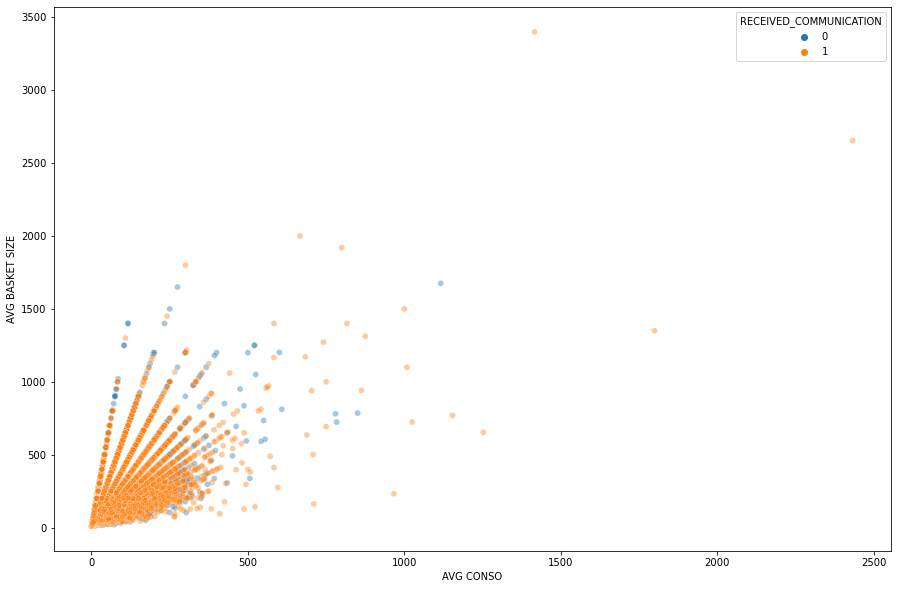

In [45]:
plt.figure(figsize=(15,10))
g = sns.scatterplot(data=clients, x='AVG CONSO', y='AVG BASKET SIZE', 
                    hue='RECEIVED_COMMUNICATION', alpha=0.4)

<AxesSubplot:xlabel='RECEIVED_COMMUNICATION', ylabel='AVG BASKET SIZE'>

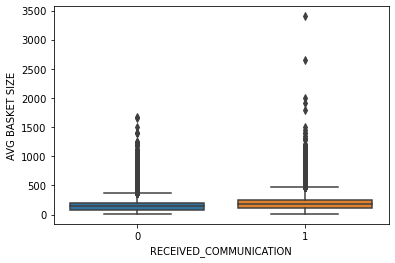

In [47]:
sns.boxplot(data=clients, x='RECEIVED_COMMUNICATION', y='AVG BASKET SIZE')